In [11]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [17]:
data_path = os.getcwd() + "\Data\Transformed_Data\goalkeepers_correlated.csv"

df = pd.read_csv(data_path)
df.head()

,Season,name,position,team,total_points,bps,clean_sheets,minutes,bonus,influence,ict_index,saves,value,selected,penalties_saved,transfers_in
0,2021-22,David de Gea,GK,Man Utd,2,17,0,90,0,34.4,3.4,5,50,473518,0,19470
1,2021-22,Tom Heaton,GK,Man Utd,0,0,0,0,0,0.0,0.0,0,40,42318,0,222
2,2021-22,Dean Henderson,GK,Man Utd,0,0,0,0,0,0.0,0.0,0,47,36124,0,71
3,2021-22,Bernd Leno,GK,Arsenal,0,0,0,0,0,0.0,0.0,0,46,83324,0,321
4,2021-22,Aaron Ramsdale,GK,Arsenal,3,23,0,90,0,47.4,4.7,7,49,1125402,0,74772


<AxesSubplot:>

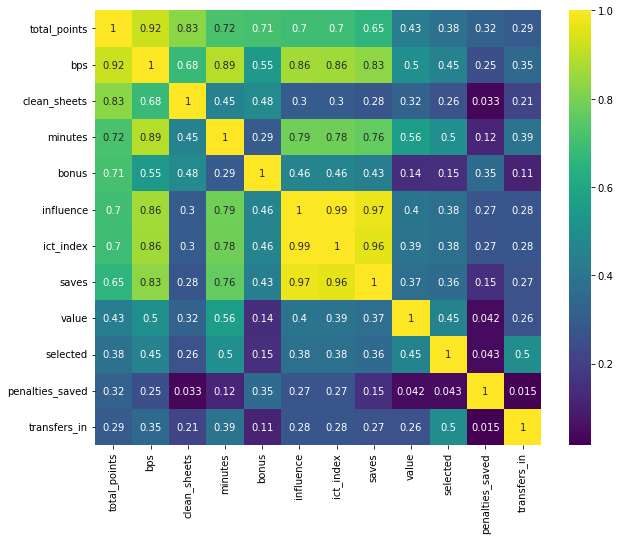

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9167 entries, 0 to 9166
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Season           9167 non-null   object 
 1   name             9167 non-null   object 
 2   position         9167 non-null   object 
 3   team             9167 non-null   object 
 4   total_points     9167 non-null   int64  
 5   bps              9167 non-null   int64  
 6   clean_sheets     9167 non-null   int64  
 7   minutes          9167 non-null   int64  
 8   bonus            9167 non-null   int64  
 9   influence        9167 non-null   float64
 10  ict_index        9167 non-null   float64
 11  saves            9167 non-null   int64  
 12  value            9167 non-null   int64  
 13  selected         9167 non-null   int64  
 14  penalties_saved  9167 non-null   int64  
 15  transfers_in     9167 non-null   int64  
dtypes: float64(2), int64(10), object(4)
memory usage: 1.1+ MB


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_points,9167.0,1.371550,2.490709,-3.0,0.0,0.0,2.0,16.0
bps,9167.0,6.811280,9.983379,-7.0,0.0,0.0,14.0,54.0
clean_sheets,9167.0,0.105596,0.307337,0.0,0.0,0.0,0.0,1.0
minutes,9167.0,33.220137,43.339547,0.0,0.0,0.0,90.0,90.0
bonus,9167.0,0.107342,0.478467,0.0,0.0,0.0,0.0,3.0
influence,9167.0,8.332235,13.811704,0.0,0.0,0.0,14.4,102.8
ict_index,9167.0,0.847627,1.407785,0.0,0.0,0.0,1.5,10.4
saves,9167.0,1.081161,1.850324,0.0,0.0,0.0,2.0,14.0
value,9167.0,45.662049,4.898880,39.0,42.0,45.0,49.0,63.0
selected,9167.0,238444.637395,399008.206757,0.0,9576.0,55744.0,309691.0,3383221.0


Let's look at the distribution of total points.

C:\Users\GV147BE\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_points', ylabel='Density'>

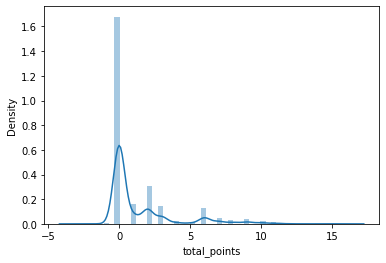

In [22]:
sns.distplot(df['total_points'])

We can see that there are a large amount of 0 total_points entries, we need to check if this is because they did not play any minutes.

In [24]:
print('Not Played: ' + len(df[df['minutes']==0])
print('Played:')

5753